# Iris Classification Using Python

## About Data

### Overview
The Iris dataset is a well-known dataset in the field of machine learning and statistics. It contains 150 observations of iris flowers, with each observation consisting of four features and a target label. The dataset was introduced by the British biologist and statistician Ronald A. Fisher in 1936.

### Features
The dataset contains the following features (all measured in centimeters):

1. **Sepal Length**: The length of the sepal.
2. **Sepal Width**: The width of the sepal.
3. **Petal Length**: The length of the petal.
4. **Petal Width**: The width of the petal.

### Target Labels
The target label in the dataset represents the species of the iris flower. There are three species as follows: 

- setosa
- versicolor
- virginica

## References
- Fisher, R.A. (1936). "The Use of Multiple Measurements in Taxonomic Problems". Annals of Eugenics. 7 (2): 179–188.
- UCI Machine Learning Repository: [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/iris)




In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

In [2]:
# load the data
df = pd.read_csv('/kaggle/input/iriscsv/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.shape

(150, 6)

In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
# check for missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [9]:
# check for duplicates in the data
df.duplicated().sum()

0

In [10]:
# remove id column
df.drop('Id', axis = 1, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# Descriptive Summary
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualizations

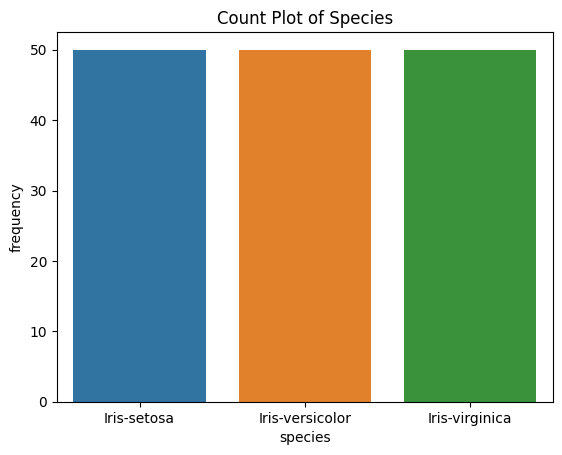

In [12]:
# count plot of species
sns.countplot(df, x='Species')
plt.title('Count Plot of Species')
plt.xlabel('species')
plt.ylabel('frequency')
plt.show()

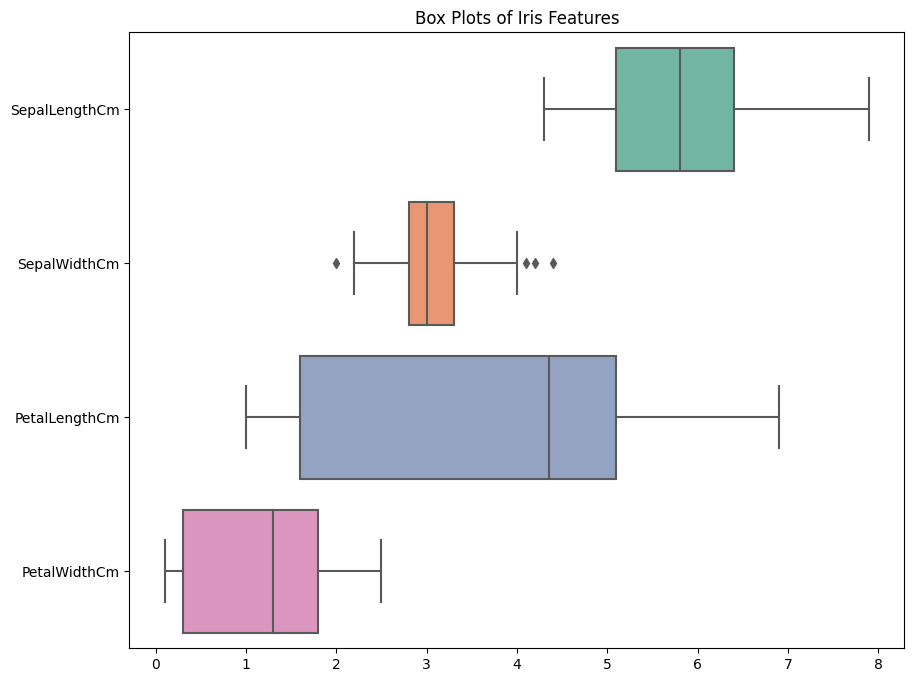

In [13]:
# box plots for each numerical feature
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, orient='h', palette='Set2')
plt.title('Box Plots of Iris Features')
plt.show()

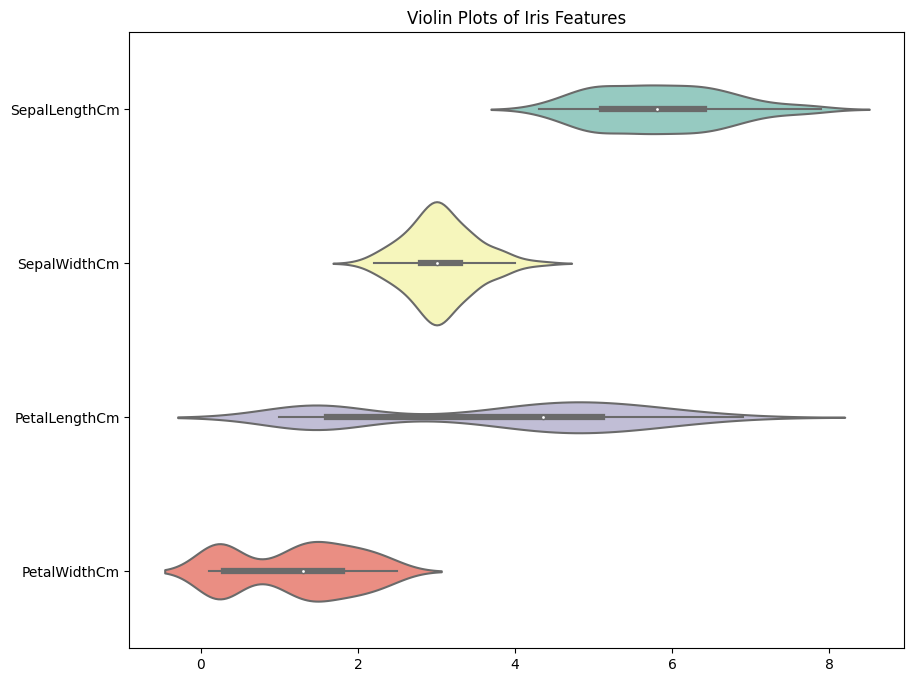

In [14]:
# Create violin plots for each numerical feature
plt.figure(figsize=(10, 8))
sns.violinplot(data=df, orient='h', palette='Set3')
plt.title('Violin Plots of Iris Features')
plt.show()

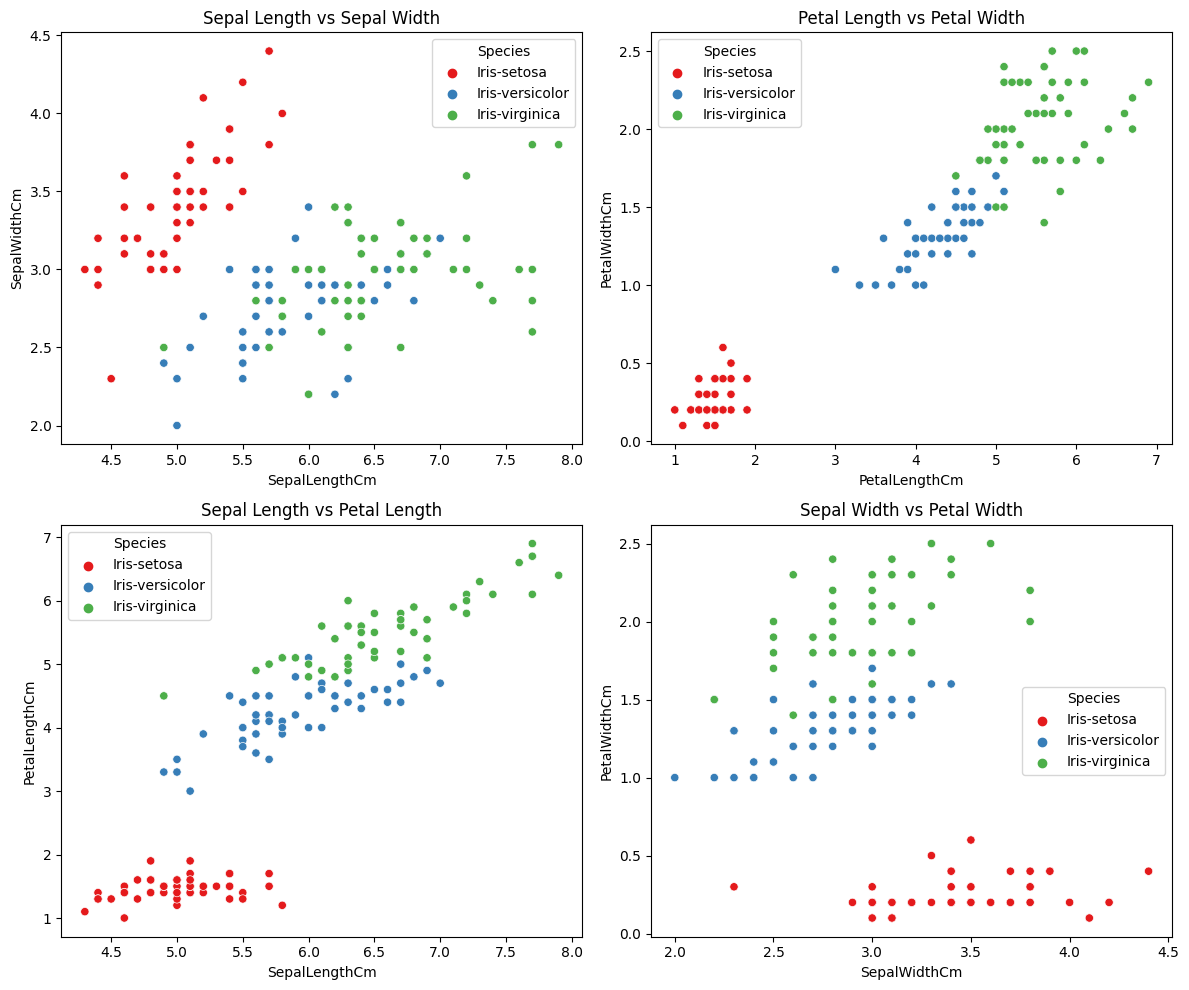

In [15]:
# Create scatter plots for selected pairs of features
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='Set1')
plt.title('Sepal Length vs Sepal Width')

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette='Set1')
plt.title('Petal Length vs Petal Width')

plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='SepalLengthCm', y='PetalLengthCm', hue='Species', palette='Set1')
plt.title('Sepal Length vs Petal Length')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='SepalWidthCm', y='PetalWidthCm', hue='Species', palette='Set1')
plt.title('Sepal Width vs Petal Width')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

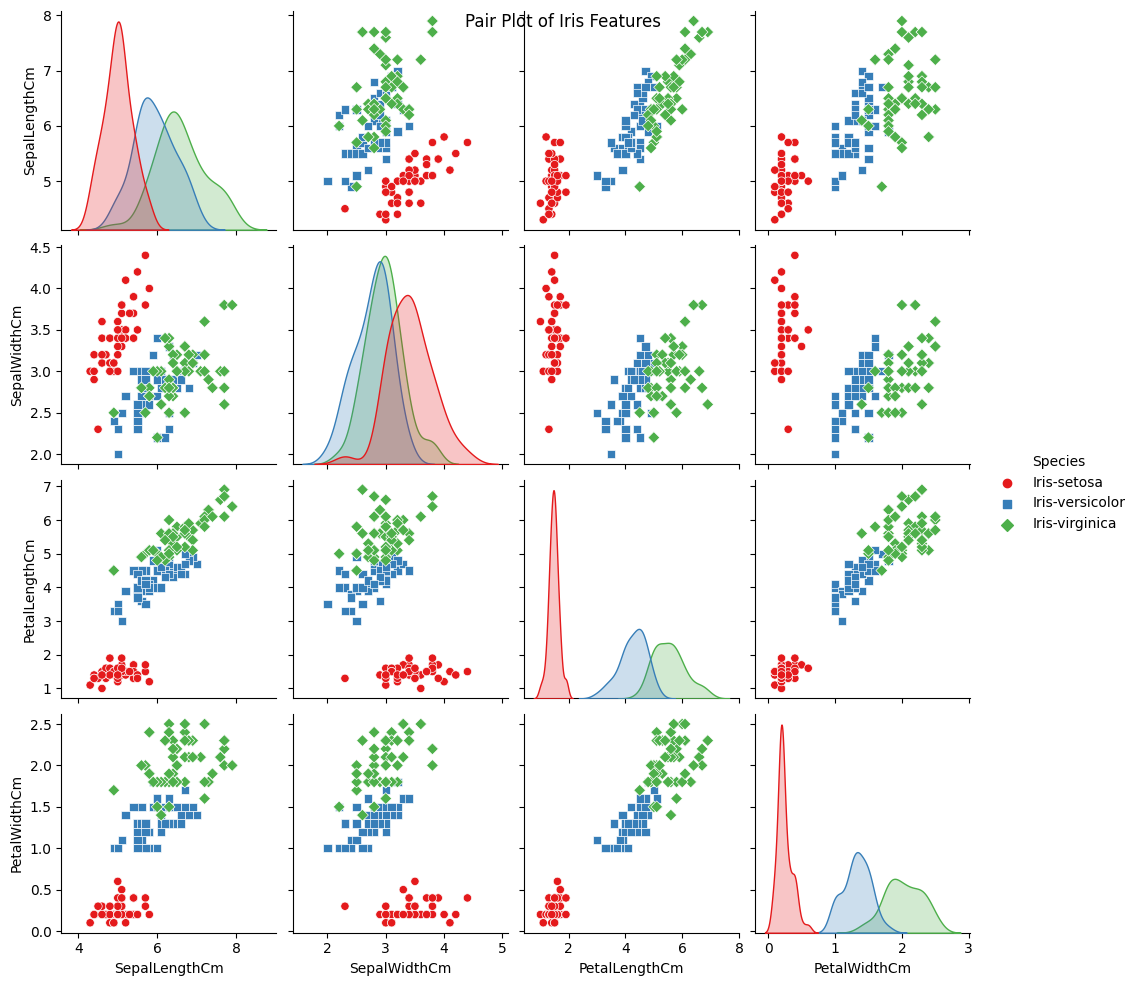

In [16]:
# Pair plots provide a grid of scatter plots for each pair of numerical features along with histograms for individual features.
sns.pairplot(df, hue='Species', palette='Set1', markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Iris Features')
plt.show()

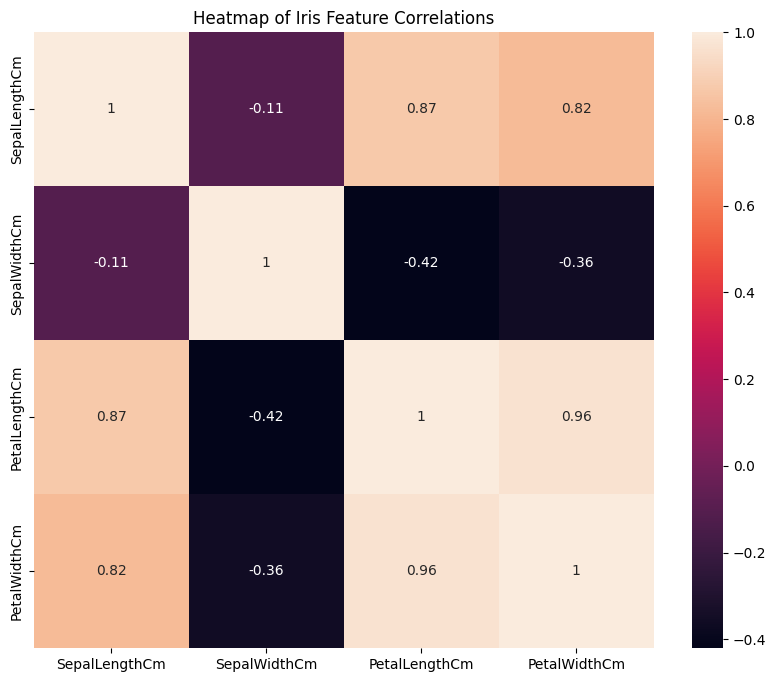

In [17]:
# heatmap for correlation matrix
numerical_features = df.drop(columns='Species')
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)

# Add title
plt.title('Heatmap of Iris Feature Correlations')
plt.show()

In [18]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
# Encode the data
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
# extract independent and dependent variables 
X = df.drop(columns='Species')
y = df['Species']

# train test split
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
# print the shapes 
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (120, 4)
X_test:  (30, 4)
y_train:  (120,)
y_test:  (30,)


## Model Selection

Models that we will use:

- Logistic Regression
- SVM
- Decision Tree
- Random Forest
- AdaBoost
- Gradient Boosting
- Naive Bayes

In [22]:
models = [
    ('LogisticRegression', LogisticRegression()),
    ('SVC', SVC()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('MultinomialNB', MultinomialNB()),
    ('BernoulliNB', BernoulliNB())
]

best_model = None
best_accuracy = 0
# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline



# save the best model
import pickle
pickle.dump(best_model, open('iris_classification.pkl', 'wb'))
print("-----------------------------------------------------------")
print(f"Best model: {best_model} with accuracy score: {best_accuracy}")

Model: LogisticRegression
Test Accuracy: 0.9666666666666667

Model: SVC
Test Accuracy: 0.9666666666666667

Model: DecisionTreeClassifier
Test Accuracy: 0.9666666666666667



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: RandomForestClassifier
Test Accuracy: 0.9666666666666667

Model: AdaBoostClassifier
Test Accuracy: 0.9666666666666667

Model: GradientBoostingClassifier
Test Accuracy: 0.9666666666666667

Model: MultinomialNB
Test Accuracy: 1.0

Model: BernoulliNB
Test Accuracy: 0.3

-----------------------------------------------------------
Best model: Pipeline(steps=[('model', MultinomialNB())]) with accuracy score: 1.0
